Data Cleaning Section

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
March_Data = pd.read_csv('Portfolio Manager All Stores March 2022.xlsx - Totals.csv')
March_Data.rename(columns={'Unnamed: 0':'Dealership'}, inplace=True)
March_Data = March_Data.assign(Month=['March']*27)
March_Data['TOTAL GROSS'] = March_Data['TOTAL GROSS'].replace('[$,]', '', regex=True).astype(float)
March_Data['F&I'] = March_Data['F&I'].replace('[$,]', '', regex=True).astype(float)

In [38]:
April_Data = pd.read_csv('Portfolio Report April 2022.csv')
April_Data = April_Data.iloc[0:27]
April_Data.rename(columns={'Unnamed: 0':'Dealership'}, inplace=True)
April_Data = April_Data.assign(Month=['April']*27)
April_Data['TOTAL GROSS'] = April_Data['TOTAL GROSS'].replace('[$,]', '', regex=True).astype(float)
April_Data['F&I'] = April_Data['F&I'].replace('[$,]', '', regex=True).astype(float)
April_Data['Service Sales'] = April_Data['Service Sales'].astype('int64')
April_Data['Portfolio/Campaign Sales'] = April_Data['Portfolio/Campaign Sales'].astype('int64')
April_Data['Ordered'] = April_Data['Ordered'].astype('int64')
April_Data['Total Sales'] = April_Data['Total Sales'].astype('int64')
April_Data['Acquisition'] = April_Data['Acquisition'].astype('int64')

In [39]:
February_Data = pd.read_csv('Portfolio Manager February.csv')
February_Data.rename(columns={'Unnamed: 0':'Dealership'}, inplace=True)
February_Data = February_Data.assign(Month=['February']*27)
February_Data['TOTAL GROSS'] = February_Data['TOTAL GROSS'].replace('[$,]', '', regex=True).astype(float)
February_Data['F&I'] = February_Data['F&I'].replace(np.nan, 0)
February_Data['F&I'] = February_Data['F&I'].replace('[$,]', '', regex=True).astype(float)

In [40]:
May_Data = pd.read_csv('Portfolio Repor May 2022.xlsx - Totals.csv')
May_Data.rename(columns={'Unnamed: 0':'Dealership'}, inplace=True)
May_Data = May_Data.assign(Month=['May']*27)
May_Data['TOTAL GROSS'] = May_Data['TOTAL GROSS'].replace('[$,]', '', regex=True).astype(float)
May_Data['F&I'] = May_Data['F&I'].replace('[$,]', '', regex=True).astype(float)

In [41]:
June_Data = pd.read_csv('PORTFOLIO JUNE JIM DANE.xlsx - Totals.csv')
June_Data.rename(columns={'Unnamed: 0':'Dealership'}, inplace=True)

June_Data = June_Data.assign(Month=['June']*27)
June_Data['TOTAL GROSS'] = June_Data['TOTAL GROSS'].replace('[$,]', '', regex=True).astype(float)
June_Data['F&I'] = June_Data['F&I'].replace('[$,]', '', regex=True).astype(float)

Combine Data Section

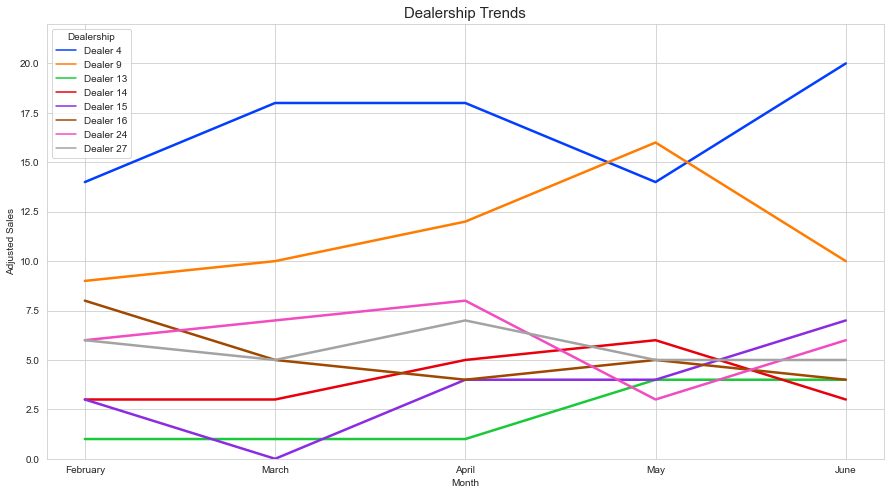

In [42]:
plt.figure(figsize=(15,8))
Mass_Data_Set = pd.concat([February_Data, March_Data, April_Data, May_Data, June_Data], ignore_index=True)
Mass_Data_Set['Adjusted Sales'] = Mass_Data_Set['Total Sales'] - Mass_Data_Set['Ordered']
Jim_Stores = Mass_Data_Set[Mass_Data_Set['Dealership'].isin(['Dealer 4', 'Dealer 9', 'Dealer 13', 'Dealer 14', 'Dealer 15', 'Dealer 16', 'Dealer 24', 'Dealer 27'])]
dplot =sns.lineplot(data=Jim_Stores, x='Month', y='Adjusted Sales', hue='Dealership', linewidth=2.5, palette='bright')
dplot.set_title('Dealership Trends', fontsize=15)
dplot.set(ylim=(0,22))
plt.savefig('Adjusted_Dealership_Trends.png')
plt.show()
plt.close()

Analysis Section

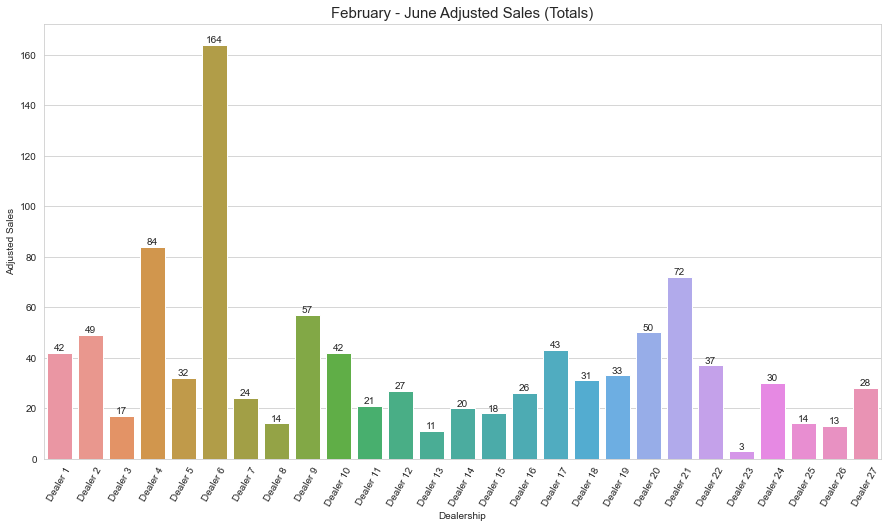

In [43]:
plt.figure(figsize=(15,8))
mplot = sns.barplot(data=Mass_Data_Set, x='Dealership', y='Adjusted Sales', estimator=sum, ci=None)
plt.bar_label(mplot.containers[0])
mplot.set_title('February - June Adjusted Sales (Totals)', fontsize=15)
plt.xticks(rotation=60)
plt.savefig('Mass_Bar_Sales.png')
plt.show()
plt.close()